In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler

In [2]:
# data 
# https://www.kaggle.com/datasets/fedesoriano/the-boston-houseprice-data

In [3]:
data = pd.read_csv('../Data/boston.csv')

data.info()

data.dropna(inplace=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [4]:
corr_matrix = data.corr()

corr_matrix

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


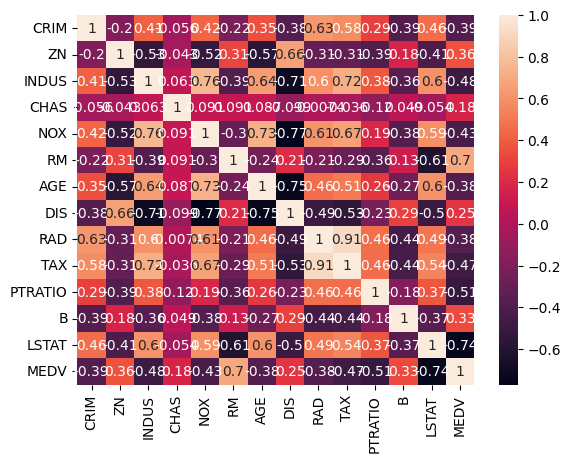

In [5]:
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [6]:
X = data.drop(['MEDV'], axis=1)

y = data['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
regressor = LinearRegression()

regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

df.to_csv('LR.csv')

df

,Actual,Predicted
329,22.6,24.935708
371,50.0,23.751632
219,23.0,29.326383
403,8.3,11.975346
78,21.2,21.372725
...,...,...
4,36.2,27.811077
428,11.0,14.506816
385,7.2,7.573699
308,22.8,28.334807


In [8]:
print('-----------------------------------')
print('Linear Regression')
print('Train Score: ', regressor.score(X_train, y_train))
print('Test Score: ', regressor.score(X_test, y_test))
print('Intercept: ', regressor.intercept_)
print('Mean Squared Error: ', mean_squared_error(y_test, y_pred))
print('R2 Score: ', r2_score(y_test, y_pred))
print('Mean Absolute Error: ', mean_absolute_error(y_test, y_pred))
print('Mean Absolute Percentage Error: ', mean_absolute_percentage_error(y_test, y_pred))
# print('Confusion Matrix: ', confusion_matrix(y_test, y_pred))
print('-----------------------------------')

-----------------------------------
Linear Regression
Train Score:  0.7645451026942549
Test Score:  0.6733825506400195
Intercept:  22.7454802259887
Mean Squared Error:  27.195965766883205
R2 Score:  0.6733825506400195
Mean Absolute Error:  3.6099040603818127
Mean Absolute Percentage Error:  0.18118047288424027
-----------------------------------


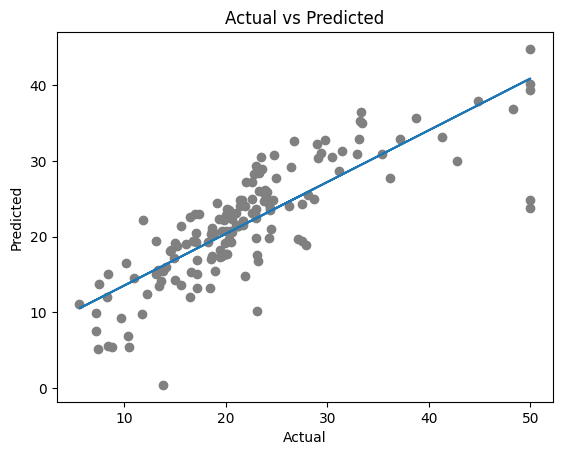

In [9]:
plt.scatter(y_test, y_pred, color='grey', marker='o')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
a, b = np.polyfit(y_test, y_pred, 1)
plt.plot(y_test, a*y_test+b)        
plt.show()
